# Notebook Summary

* This notebook discusses the hyperparameters to be used according to the type of classification(binary/multi-class).

* It discusses ways to improve model.

* It discusses various evaluation metrics.

* It discusses a multi-class clasification example.

* It displays the need of Flatten layer.

* It shows the importance of Normalization.

* It uses the LearningRateScheduler callback.

* Custom confusion matrix.

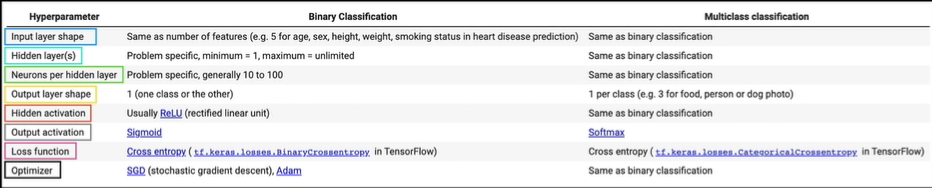

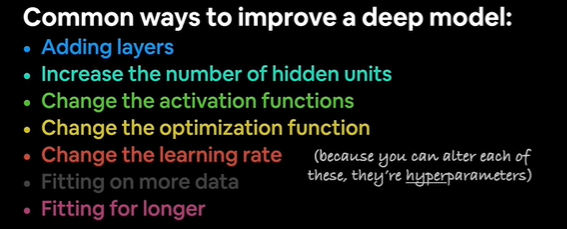

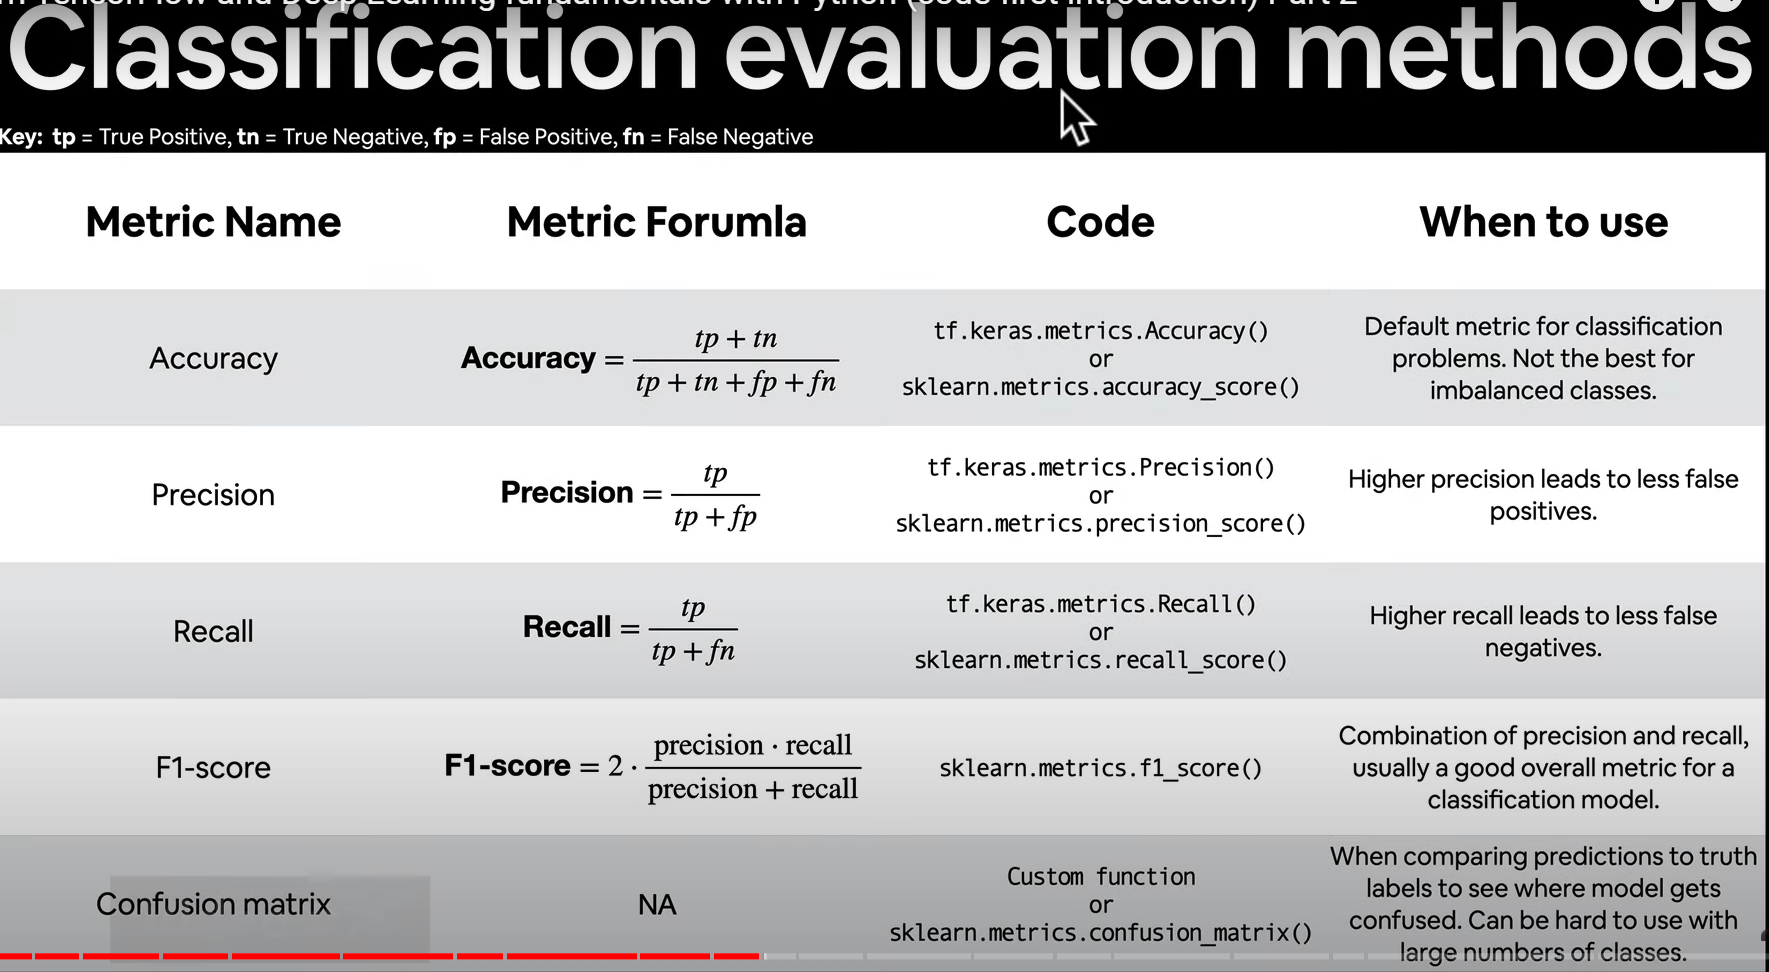

# MULTICLASS CLASSIFICATION


### Dataset :-

#### fashion_mnist 

In [ ]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data,train_labels) ,(test_data,test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# showing first training example

train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_labels[0]

9

In [ ]:
# checking the shape of single example

train_data[0].shape , train_labels[0].shape

((28, 28), ())

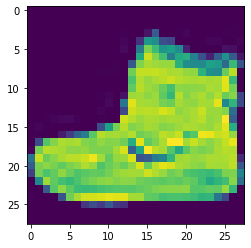

In [ ]:
# Plotting a sample

import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [ ]:
train_labels[0]

9

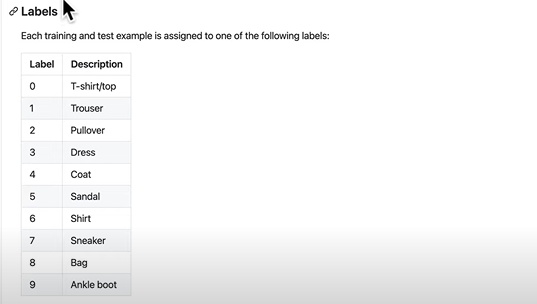

In [ ]:
# Making an understandable list for labels like the above image

class_names = ["T-shirt/top","  Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]


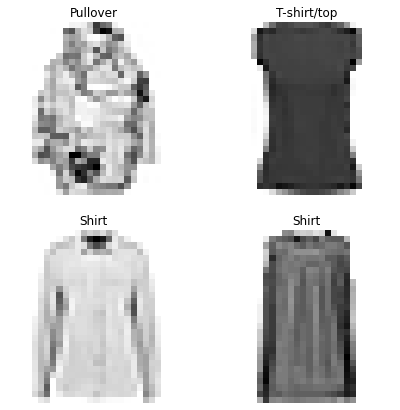

In [ ]:
# Plotting multiple random images

import random

plt.figure(figsize = (7,7))

for i in range(4):

  ax = plt.subplot(2,2,i+1)

  rand_index = random.choice(range(len(train_data)))

  plt.imshow(train_data[rand_index] , cmap = plt.cm.binary) # Sicne the original dataset is black and white

  plt.title(class_names[train_labels[rand_index]])

  plt.axis(False)

### Building a multiclass classification model
  * Input shape = 28*28 (shape of one image)
  * Output shape = 10 (one per class of clothing)
  * Loss function = tf.keras.losses.CategoricalCrossentropy()
  * Output layer activation = Softmax


In [ ]:
# We will need to flatten the data as neural networks take flattened data i.e. 28*28 should be given as 784.
# So we'll make a layer in out model accordingly.

# Also the CategoricalCrossentropy loss function takes one hot encoded labels.
# So we will get an error.
# To avoid the error we'll use SparseCategoricalCrossentropy loss function.

# or we can also pass tf.one_hot(train_labels ,depth = 10) in fit function instead of train_labels directly.


# If we get any shape error we need to thus check input shape(flatten it), output shape(no. of labels here),loss function being used.

In [ ]:
# setting random seed

tf.random.set_seed(42)

# creating the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),                          
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation= "softmax")
])


# compiling the model

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fitting the model

non_norm_history = model_1.fit(train_data,train_labels,epochs = 10,validation_data = (test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8205 - accuracy: 0.1345 - val_loss: 1.7848 - val_accuracy: 0.2066
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7424 - accuracy: 0.2286 - val_loss: 1.6682 - val_accuracy: 0.2824
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6418 - accuracy: 0.2813 - val_loss: 1.6110 - val_accuracy: 0.2724
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6015 - accuracy: 0.2816 - val_loss: 1.6112 - val_accuracy: 0.2832
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6036 - accuracy: 0.2869 - val_loss: 1.5950 - val_accuracy: 0.2959
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5872 - accuracy: 0.2912 - val_loss: 1.5949 - val_accuracy: 0.2995
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5758 - accuracy: 0.3102 - val_loss: 1.5735 - val_accuracy:

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Checking the min and max of training data

train_data.min() , train_data.max()

(0, 255)

In [ ]:
# Neural networks prefer data to be scaled (or normalized) - getting data between 0 and 1.

train_data_norm = train_data/255.0

test_data_norm = test_data/255.0


In [ ]:
# Making a model for normalized data

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (28,28)),
      tf.keras.layers.Dense(4 , activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(10 , activation = 'softmax')
])

# compile

model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

norm_history = model2.fit(train_data_norm,
                          train_labels,
                          epochs = 10,
                          validation_data = (test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

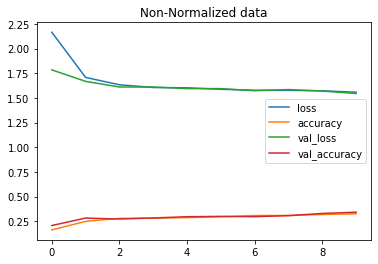

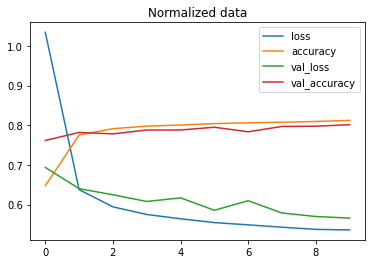

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title = "Non-Normalized data")

pd.DataFrame(norm_history.history).plot(title = "Normalized data")

### Trying to find the ideal learning rate.

In [ ]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (28,28)),
      tf.keras.layers.Dense(4 , activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(10 , activation = 'softmax')
])

# compile

model3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

# creating the callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model3.fit(train_data_norm,train_labels,epochs = 40,validation_data = (test_data_norm,test_labels),callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

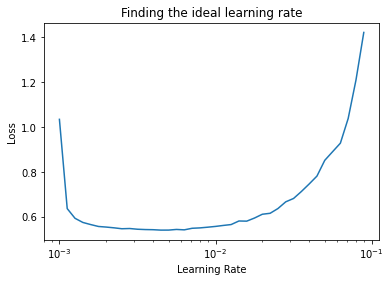

In [ ]:
# Plotting the learning rate decay curve

import numpy as np

import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Our ideal learning rate is close to 0.001

In [ ]:
# tf.random.set_seed(42)

# model4 = tf.keras.Sequential([
#       tf.keras.layers.Flatten(input_shape = (28,28)),
#       tf.keras.layers.Dense(4 , activation = 'relu'),
#       tf.keras.layers.Dense(4,activation = 'relu'),
#       tf.keras.layers.Dense(10 , activation = 'softmax')
# ])

# # compile

# model4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
#                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
#                metrics = ["accuracy"])

# # creating the callback

# history4 = model3.fit(train_data_norm,train_labels,epochs = 20,validation_data = (test_data_norm,test_labels))

# Set random seed
tf.random.set_seed(42)

# Create the model
model4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8205 - accuracy: 0.1345 - val_loss: 1.7848 - val_accuracy: 0.2066
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7424 - accuracy: 0.2286 - val_loss: 1.6682 - val_accuracy: 0.2824
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6418 - accuracy: 0.2813 - val_loss: 1.6110 - val_accuracy: 0.2724
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6015 - accuracy: 0.2816 - val_loss: 1.6112 - val_accuracy: 0.2832
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6036 - accuracy: 0.2869 - val_loss: 1.5950 - val_accuracy: 0.2959
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5872 - accuracy: 0.2912 - val_loss: 1.5949 - val_accuracy: 0.2995
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5758 - accuracy: 0.3102 - val_loss: 1.5735 - val_accuracy:

In [ ]:
y_probs = model4.predict(test_data_norm)

y_preds = y_probs.argmax(axis = 1)

y_preds[:10]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

### Evaluating our model

In [ ]:
# Creating a confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[  6,   0,   0,   0,  22, 972,   0,   0,   0,   0],
       [ 12,   0,   1,   0,  31, 956,   0,   0,   0,   0],
       [ 27,   0,  22,   0,  32, 919,   0,   0,   0,   0],
       [  0,   0,   2,   0,  23, 975,   0,   0,   0,   0],
       [ 17,   0,   6,   0,  15, 962,   0,   0,   0,   0],
       [ 76,   0,  38,   0,   5, 881,   0,   0,   0,   0],
       [ 18,   0,   5,   0,  24, 953,   0,   0,   0,   0],
       [  1,   0,   8,   0,   2, 989,   0,   0,   0,   0],
       [ 10,   0,   4,   0,   4, 982,   0,   0,   0,   0],
       [106,   0,   3,   0,   1, 890,   0,   0,   0,   0]])

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

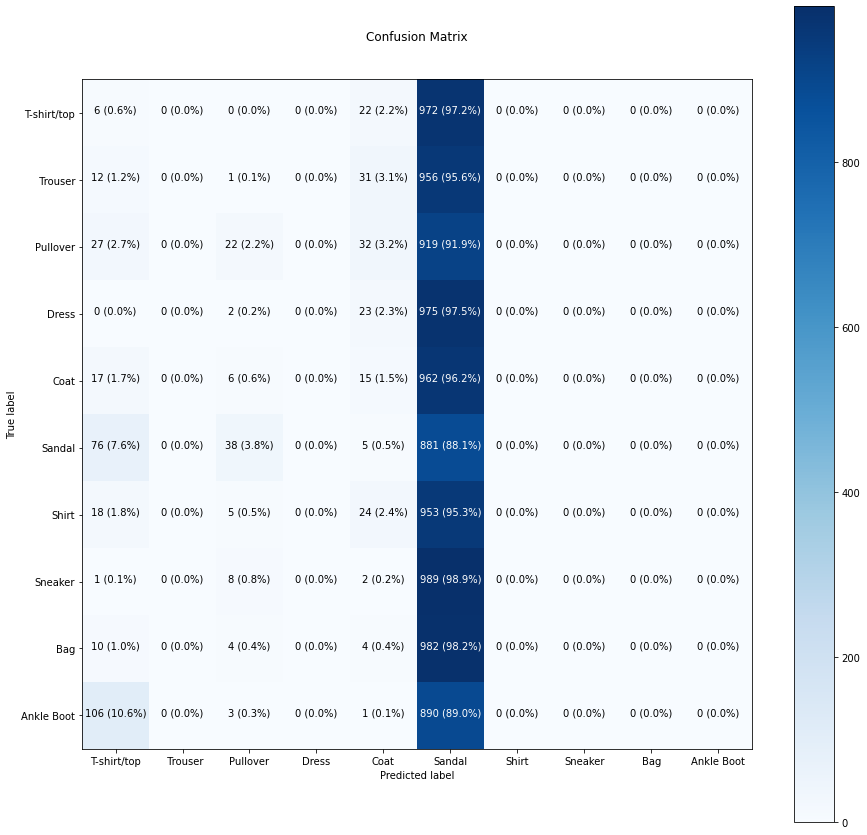

In [ ]:

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

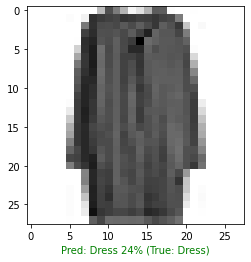

In [ ]:

# Check out a random image as well as its prediction
plot_random_image(model=model4, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

### What patterns is our neural network learning ?

In [ ]:
model4.layers

In [ ]:
model4.layers[1]

In [ ]:

# Get the patterns of a layer in our network
weights, biases = model4.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.04430212, -0.01029544, -0.02567479, -0.00619847],
        [-0.2453318 ,  0.03222882,  0.85859907,  0.06499861],
        [-0.3255158 , -0.04830738,  0.7821161 ,  0.0388018 ],
        ...,
        [ 0.10541608,  0.01661945, -0.1608251 , -0.02348963],
        [ 0.07408534,  0.02673633,  0.17091513, -0.07461146],
        [ 0.03866251,  0.027058  ,  0.14858663, -0.05812328]],
       dtype=float32), (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 0.8075651 , -0.02614264,  0.922308  , -0.00740097], dtype=float32),
 (4,))

In [ ]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Seeing our neural network

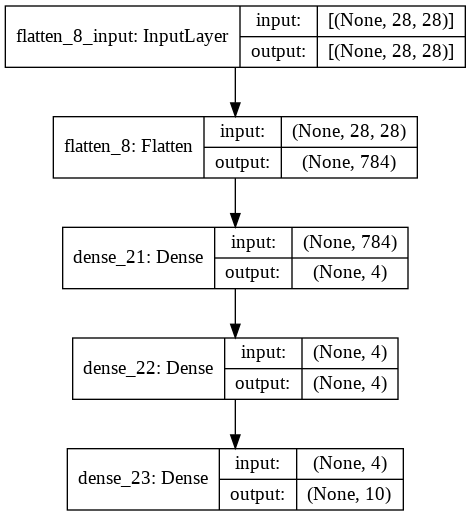

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model4, show_shapes=True)
